In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import utility
from utils.encoder import OneHotEncoder, ThermometerEncoder, IntegerEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv')
df = df.dropna()
df_clean = df.copy()
df_clean = df_clean.iloc[1:, 1:]
for col in df_clean.columns:
    df_clean[col] = df_clean[col].astype(int)



In [3]:
feature_name_dic = dict(zip(df_clean.columns, df_clean.iloc[0,:]))

nominal_features = ['X2', 'X4']
ordinal_features = ['X3']+[f'X{i}' for i in range(6, 11+1, 1)]
label = ['Y']
other_features = list(set(df_clean.columns) - (set(nominal_features + ordinal_features + label)))

ordinal_features_plus = ['X10',  'X6']
# o = ['X8', 'X7', 'X9']

# ordinal_features = list(set(ordinal_features)-set(o))

# # ordinal_features = ['X8', 'X7', 'X9']

In [4]:
unique_dic = utility.df_to_dict(df_clean)

unique_ordered_dic = utility.order(unique_dic, *(nominal_features+ordinal_features+label))

nominal_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(nominal_features)}
ordinal_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(ordinal_features)}
label_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(label)}

ordinal_dic_plus = {key: ordinal_dic[key] for key in ordinal_features_plus}

In [5]:
ordinal_dic

{'X10': array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 'X3': array([0, 1, 2, 3, 4, 5, 6]),
 'X11': array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 'X6': array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 'X9': array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 'X7': array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 'X8': array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])}

In [6]:
len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

(14, 6, 71)

In [7]:
df_clean.to_csv('clean_dataset\default_of_credit_card_clients\default_of_credit_card_clients_clean.csv', index=False)

Text(0.5, 1.0, 'Default of Credit Clients')

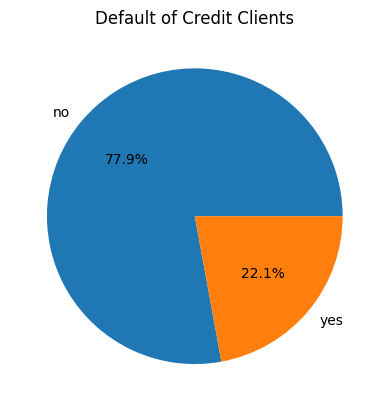

In [8]:
labels = list(label_dic.values())[0]
sizes = [len(df_clean[df_clean['Y'] == val]) for val in labels]
plt.pie(sizes, labels=['yes' if val == 1 else 'no' for val in labels], autopct='%1.1f%%')
plt.title('Default of Credit Clients')

In [9]:
# import random
# from sklearn.model_selection import KFold
# k=10
# regr = LogisticRegression(max_iter=1000)
# test_pred_res, test_true_res = [], []
# train_pred_res, train_true_res = [], []
# sc = StandardScaler()
# kf = KFold(k)   
# X = df_clean.iloc[:, :-1]
# y = df_clean.iloc[:, -1]
# for train_index, test_index in kf.split(df_clean):
#     X_train, y_train, X_test, y_test = X.iloc[train_index], pd.DataFrame(y.iloc[train_index]), X.iloc[test_index], pd.DataFrame(y.iloc[test_index])
#     # random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], ThermometerEncoder, ordinal_dic_plus)
#     nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], OneHotEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], OneHotEncoder, ordinal_dic)
#     other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     sc.fit(other_train)
#     other_train, other_test = sc.transform(other_train), sc.transform(other_test)
#     y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     # X_train_all, X_test_all = ordinal_train, ordinal_test
#     X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred_test = regr.predict(X_test_all)
#     y_pred_train = regr.predict(X_train_all)
#     test_true_res = test_true_res+ [np.squeeze(y_test)] if len(test_true_res)> 0 else [np.squeeze(y_test)]
#     test_pred_res = test_pred_res+ [np.squeeze(y_pred_test)] if len(test_pred_res)> 0 else [np.squeeze(y_pred_test)]
#     train_true_res = train_true_res+ [np.squeeze(y_train)] if len(train_true_res)> 0 else [np.squeeze(y_train)]
#     train_pred_res = train_pred_res+ [np.squeeze(y_pred_train)] if len(train_pred_res)> 0 else [np.squeeze(y_pred_train)]

# test_temp_res, train_temp_res = [], []
# for i in range(k):
#     test_temp_res.append(classification_report(test_true_res[i], test_pred_res[i], output_dict=True)) 
#     train_temp_res.append(classification_report(train_true_res[i], train_pred_res[i], output_dict=True)) 
# clf_rep_dic_test, clf_rep_dic_train = utility.concat_dic(*test_temp_res), utility.concat_dic(*train_temp_res)
# test_res, train_res = utility.mean_std_dic(clf_rep_dic_test), utility.mean_std_dic(clf_rep_dic_train)

In [10]:
# train_res['accuracy'], test_res['accuracy']

In [11]:
res, models, res_train = utility.k_fold_validation(k=10, 
                  df=df_clean, 
                  encoders=[OneHotEncoder, ThermometerEncoder, IntegerEncoder], 
                  pred_task=
                    {
                      'name': 'classification',
                      'model': LogisticRegression(max_iter=1000),
                      'metric': {'clf_rep': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)}
                    }, 
                  features=
                    {
                      'ordinal': {
                        'name': ordinal_features,
                        'dict': ordinal_dic
                      },
                      'nominal': {
                        'name': nominal_features,
                        'dict': nominal_dic
                      },
                      'numerical': other_features,
                      'label': label_dic
                    },
                    return_model=True,
                    train_result=True)

c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [12]:
# ohe_1 = models['OneHotEncoder'][0]
# te_1 = models['ThermometerEncoder'][0]
# ie_1 = models['IntegerEncoder'][0]

# other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

# nom_coef_dic = utility.create_coef_dic(other_num, nominal_dic, ohe_1.coef_,te_1.coef_, ie_1.coef_)
# ord_coef_dic = utility.create_coef_dic(other_num+nom_num, ordinal_dic, ohe_1.coef_,te_1.coef_)

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,10))
# fig.suptitle('ordinal')
# for i, (key, val) in enumerate(ord_coef_dic.items()):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]))

# fig, ax = plt.subplots(len(nom_coef_dic.keys()), 1, figsize=(5,10))
# fig.suptitle('nominal')
# for i, (key, val) in enumerate(nom_coef_dic.items()):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]))

# fig = plt.figure(figsize=(5,3))
# fig.suptitle('other')
# plt.plot(range(len(ohe_1.coef_[0][:other_num])), ohe_1.coef_[0][:other_num])
# plt.plot(range(len(te_1.coef_[0][:other_num])), te_1.coef_[0][:other_num])
# plt.plot(range(len(ie_1.coef_[0][:other_num])), ie_1.coef_[0][:other_num])

In [13]:
k=10
spec_dic = {key: [] for key in ordinal_dic.keys()}
for i in range(k):
    ohe_1 = models['OneHotEncoder'][i]
    te_1 = models['ThermometerEncoder'][i]
    ie_1 = models['IntegerEncoder'][i]

    other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

    ord_coef_dic = utility.create_coef_dic(other_num+nom_num, ordinal_dic, ordinal_features, ohe_1.coef_,te_1.coef_)
    ord_coef_dic_cum = {key: [val[0]]+[np.cumsum(val[1])] for key, val in ord_coef_dic.items()}
    for key, val in ord_coef_dic_cum.items():
        spec_dic[key] += [np.corrcoef(val)[0][1]]
spec_dic_mean_std = {key : (np.mean(val), np.std(val)) for key, val in spec_dic.items()}

In [14]:
spec_dic_mean_std

{'X10': (0.8271052822771345, 0.05008516060931823),
 'X3': (0.9787053859159853, 0.005103758450173219),
 'X11': (0.8893069878008383, 0.020247948095299367),
 'X6': (0.9904262985311721, 0.0038349277751460104),
 'X9': (0.758325588154212, 0.06695015496934459),
 'X7': (0.8887754858273487, 0.05355761539060454),
 'X8': (0.8982113035830755, 0.03418442126372443)}

Text(0, 0.5, 'correlation')

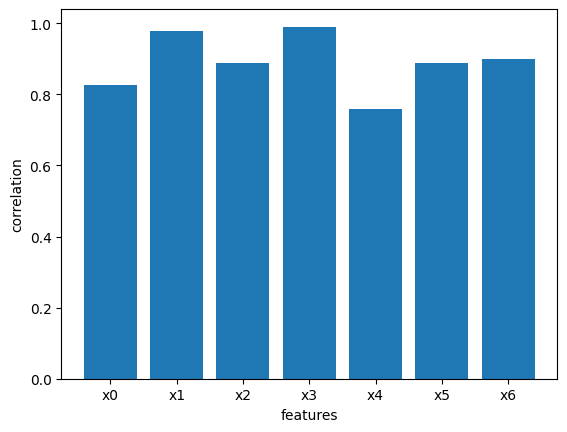

In [15]:
spec_plot = {key: val[0] for key, val in spec_dic_mean_std.items()}
plt.bar([f'x{i}' for i in range(len(spec_plot))], spec_plot.values())
plt.xlabel('features')
plt.ylabel('correlation')

In [15]:
other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

all_ohe_coef = np.array([models['OneHotEncoder'][i].coef_ for i in range(k)]).squeeze()
all_te_coef = np.array([models['ThermometerEncoder'][i].coef_ for i in range(k)]).squeeze()
# all_te_coef_cumsum = [np.cumsum(all_te_coef[:, other_num+nom_num:], axis=1) for i in [len(val) for val in ordinal_dic.values()]]
all_te_coef_cumsum = []
s=0
for i in [len(val) for val in ordinal_dic.values()]:
    all_te_coef_cumsum.append(np.cumsum(all_te_coef[:, other_num+nom_num+s:other_num+nom_num+s+i], axis=1))
    s+=i
all_te_coef_cumsum = np.concatenate(tuple(all_te_coef_cumsum), axis=1)
all_ie_coef = np.array([models['IntegerEncoder'][i].coef_ for i in range(k)]).squeeze()


all_ohe_coef_mean = np.mean(all_ohe_coef, axis=0)
# all_te_coef_mean = np.array(list(np.mean(all_te_coef, axis=0)[:other_num+nom_num]) + list(np.mean(all_te_coef_cumsum, axis=0)))
all_te_coef_mean = np.mean(np.concatenate((all_te_coef[:, :other_num+nom_num], all_te_coef_cumsum), axis=1), axis=0)
all_ie_coef_mean = np.mean(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_mean[other_num+nom_num:][idx]]*i)*np.linspace(1,i,i))
all_ie_coef_temp = np.concatenate(tuple(all_ie_coef_temp))
all_ie_coef_mean = np.concatenate((all_ie_coef_mean[:other_num+nom_num], all_ie_coef_temp))

# all_ohe_coef_mean = StandardScaler().fit_transform(all_ohe_coef_mean.reshape(-1, 1)).squeeze()
# all_te_coef_mean = StandardScaler().fit_transform(all_te_coef_mean.reshape(-1, 1)).squeeze()
# all_ie_coef_mean = StandardScaler().fit_transform(all_ie_coef_mean.reshape(-1, 1)).squeeze()

all_ohe_coef_std = np.std(all_ohe_coef, axis=0)
all_te_coef_std = np.array(list(np.std(all_te_coef, axis=0)[:other_num+nom_num]) + list(np.std(all_te_coef_cumsum, axis=0)))
all_ie_coef_std = np.std(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_std[other_num+nom_num:][idx]]*i)*np.array([1]*i))
all_ie_coef_temp = np.concatenate(tuple(all_ie_coef_temp))
all_ie_coef_std = np.concatenate((all_ie_coef_std[:other_num+nom_num], all_ie_coef_temp))

# all_ohe_coef.shape, all_te_coef.shape, all_ie_coef.shape
all_ohe_coef_mean.shape, all_te_coef_mean.shape, all_ie_coef_mean.shape
# all_ohe_coef_std.shape, all_te_coef_std.shape, all_ie_coef_std.shape

((91,), (91,), (91,))

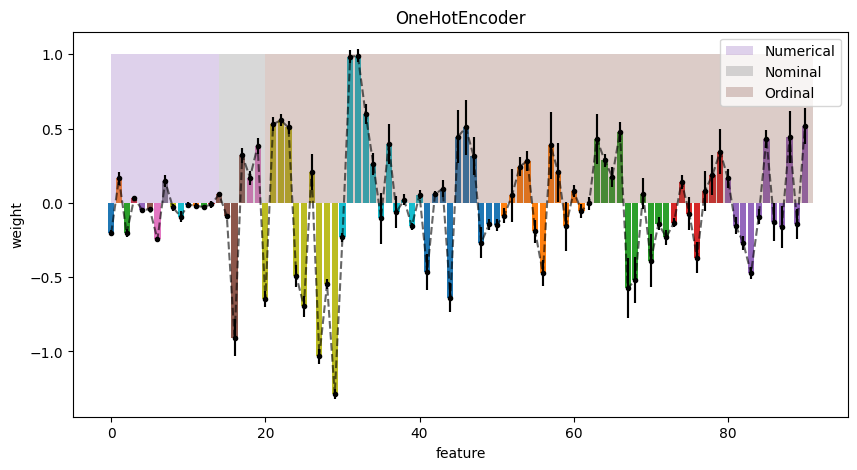

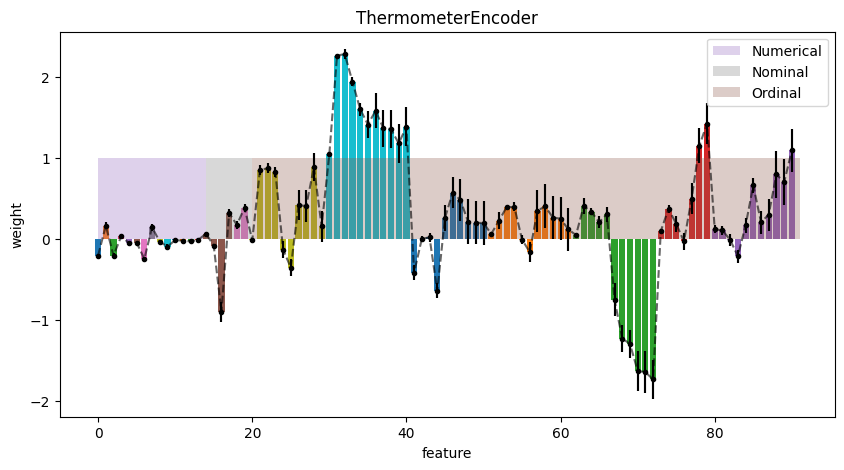

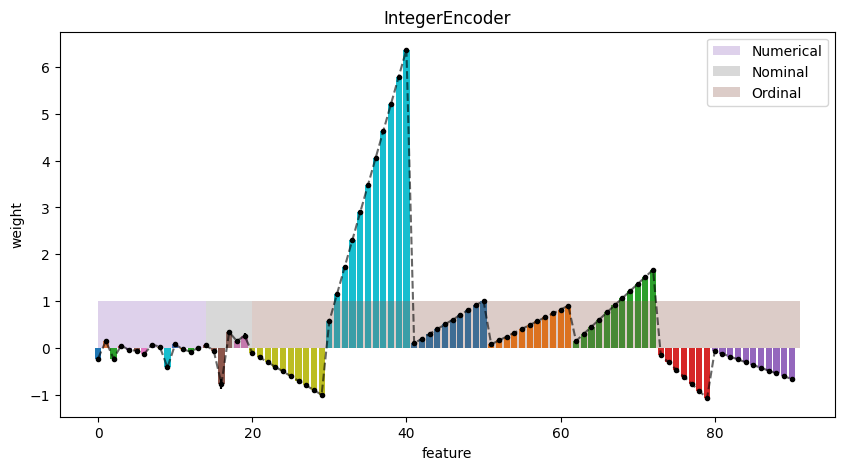

In [16]:
import matplotlib.pyplot as plt
other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
title = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
label = ['Numerical', 'Nominal', 'Ordinal']
for idx, (all_mean, all_std) in enumerate(zip([all_ohe_coef_mean, all_te_coef_mean, all_ie_coef_mean], [all_ohe_coef_std, all_te_coef_std, all_ie_coef_std])):
    plt.figure(figsize=(10,5))
    start_1 = 0
    # if idx == 2:
    #     ord_num = len(ordinal_dic.values())
    for idxx, (i, unique_val) in enumerate(zip([other_num, nom_num, ord_num], [[1]*other_num, [len(val) for val in nominal_dic.values()], [len(val) for val in ordinal_dic.values()]])):
        start_2 = 0
        # if idxx == 2 and idx == 2:
        #     unique_val = [1]*i
        for j in unique_val:  
            plt.bar(range(len(all_mean))[start_1+start_2:start_1+start_2+i+j], all_mean[start_1+start_2:start_1+start_2+i+j])
            start_2 += j
        plt.fill_between(x=[start_1, start_1+i] ,y1=[0.0], y2=[1,1],alpha=0.3,label=label[idxx])
        start_1 += i
        
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='.')
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='--', alpha=0.6)
    plt.title(title[idx])
    plt.ylabel('weight'), plt.xlabel('feature')
    plt.legend()

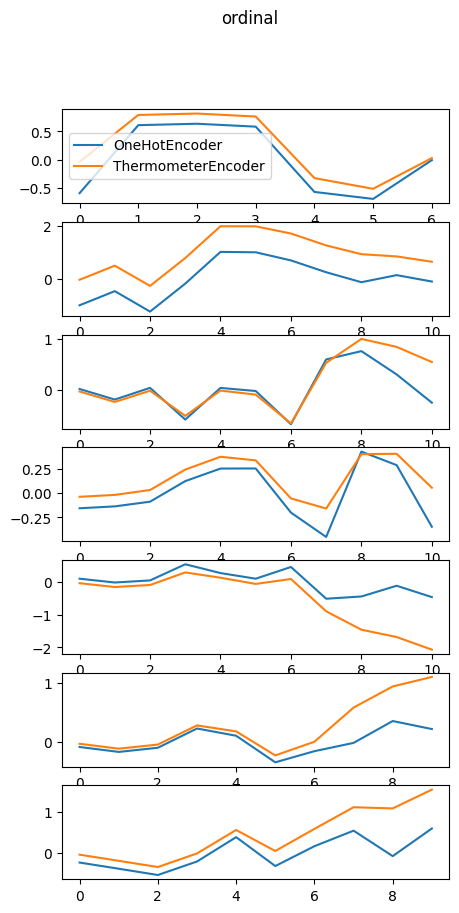

In [17]:
import matplotlib.pyplot as plt

label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']

fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,10))
fig.suptitle('ordinal')
for i, (key, val) in enumerate(ord_coef_dic_cum.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), val[j], label = label[j])
ax[0].legend()    

In [18]:
import math
def deep_copy(dic):
    dic_res = {}
    for key, val in dic.items():
        dic_res[key] = deep_copy(val) if isinstance(val, dict) else val
    return dic_res
def round_decimal_places(df, d):
    dec = math.pow(10,d)
    df_copy = df.copy()
    df_copy = df_copy.map(lambda x: (math.ceil(x[0]*dec)/dec, math.ceil(x[1]*dec)/dec))
    return df_copy
res_temp = res_train
res_copy = deep_copy(res_temp)
d = 12
for encoder in res.keys():
    res_copy[encoder]['clf_rep']['accuracy'] = {key: res_temp[encoder]['clf_rep']['accuracy'] for key in res[encoder]['clf_rep']['macro avg'].keys()}
# df_lists = [pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns") for key in res_copy.keys()]
df_lists = [round_decimal_places(pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns").drop(index='support'), d) for key in res_copy.keys()]

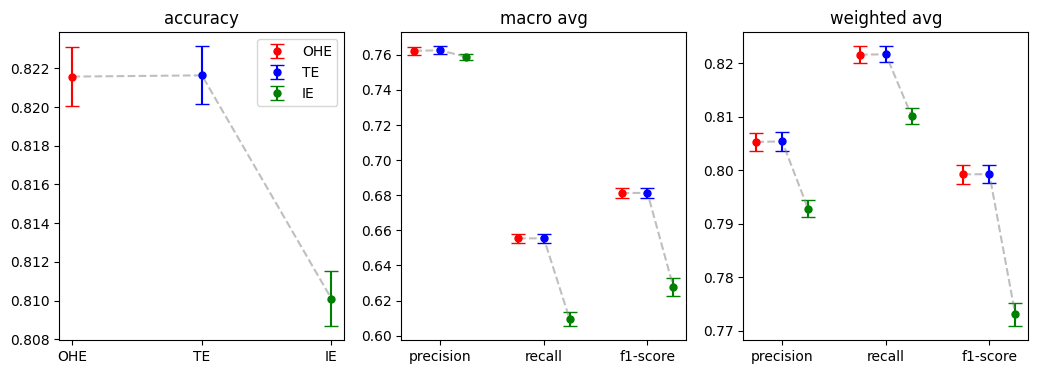

In [19]:
import matplotlib.pyplot as plt

plot_dic = {}
metrics = ['accuracy','macro avg', 'weighted avg']
inner_metrics = ['precision', 'recall', 'f1-score']

plot_dic = {}
for key in metrics:
    plot_dic[key] = {k: [] for k in inner_metrics}
    for key2 in inner_metrics:
        for dfs in df_lists:
            df_dict = dfs.to_dict()
            plot_dic[key][key2].append(list(df_dict[key][key2]))
            
            
models = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
model_names = ['OHE', 'TE', 'IE']
colors = ['r', 'b', 'g']
x_axis_placement = np.array([-0.25, 0, 0.25])
fig, ax = plt.subplots(1, 3, figsize=(12.5,4))
ax = ax.ravel()
for i, (key, val) in enumerate(plot_dic.items()):
    if key == 'accuracy':
        accs = np.array(val['precision'])
        ax[i].errorbar(range(len(accs)), accs[:,0], accs[:,1], alpha = 0.5, fmt='--', color = 'grey') 
        for j, (mean, std) in enumerate(accs):
            (_,caps,_)= ax[i].errorbar(j, accs[:,0][j], accs[:,1][j], label=model_names[j],color = colors[j], alpha = 1, fmt='.', markersize=10, capsize = 5) 
            for cap in caps:
                cap.set_markeredgewidth(1)
    else:  
        for j, (key2, val2) in enumerate(val.items()):
            model = np.array(val2)    
            x_axis=np.ones(len(model))*j
            ax[i].errorbar(x_axis + x_axis_placement, model[:,0], model[:,1], alpha = 0.5, fmt='--', color = 'grey')
            for k in range(len(x_axis)):
                (_,caps,_)= ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], label=model_names[k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) if j == 0 else ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) 
                for cap in caps:
                    cap.set_markeredgewidth(1)
for i, axe in enumerate(ax):
    axe.set_title(metrics[i])
    if metrics[i] == 'accuracy':
        axe.set_xticks(range(len(models)), model_names)
    else:
        axe.set_xticks(range(len(inner_metrics)), inner_metrics)

ax[0].legend()             
                

In [7]:
pd.DataFrame(clf_rep_dic).to_csv('default_of_credit_card_clients_k_10_wo_ord.csv')

In [20]:
with open('default_of_credit_card_clients_result\default_of_credit_card_cv_train.csv','w') as f:
    for df in df_lists:
        f.write(f"{df.columns.name}\n")
        df.to_csv(f)
        f.write("\n")

In [15]:
res

{'OneHotEncoder': {'clf_rep': {'1.0': {'precision': (0.8389322506874629,
     0.011950909110347423),
    'recall': (0.9526110343907022, 0.008762109270599746),
    'f1-score': (0.8921499498688068, 0.010190709731589948),
    'support': (2336.4, 51.70338480215778)},
   '2.0': {'precision': (0.6807545657862526, 0.044984211482826476),
    'recall': (0.35474269654724433, 0.04044885435708041),
    'f1-score': (0.4657870104858719, 0.04234718740291342),
    'support': (663.6, 51.703384802157785)},
   'accuracy': (0.8208666666666666, 0.014934821354435024),
   'macro avg': {'precision': (0.7598434082368578, 0.026209023512037532),
    'recall': (0.6536768654689732, 0.020456542394150828),
    'f1-score': (0.6789684801773392, 0.022733860668644013),
    'support': (3000.0, 0.0)},
   'weighted avg': {'precision': (0.8041393628531154, 0.018034771021814562),
    'recall': (0.8208666666666666, 0.014934821354435024),
    'f1-score': (0.798317311650443, 0.01623049389437801),
    'support': (3000.0, 0.0)}}}

In [16]:
res_train

{'OneHotEncoder': {'clf_rep': {'1.0': {'precision': (0.8393483191702659,
     0.0014283834851181582),
    'recall': (0.9533692772568998, 0.0008282619486010435),
    'f1-score': (0.8927323819861925, 0.0010655263638336381),
    'support': (21027.6, 51.70338480215778)},
   '2.0': {'precision': (0.685290994217261, 0.003996992382334962),
    'recall': (0.35752186929632634, 0.005348910846613137),
    'f1-score': (0.4698823551205595, 0.0053879056415935735),
    'support': (5972.4, 51.70338480215778)},
   'accuracy': (0.8215740740740742, 0.0015344467240576182),
   'macro avg': {'precision': (0.7623196566937634, 0.0023240532185976595),
    'recall': (0.655445573276613, 0.002558366793674236),
    'f1-score': (0.681307368553376, 0.002799605099224875),
    'support': (27000.0, 0.0)},
   'weighted avg': {'precision': (0.805275058625042, 0.001746679981782113),
    'recall': (0.8215740740740742, 0.0015344467240576182),
    'f1-score': (0.7992045053580843, 0.001769977258846598),
    'support': (27000.